<h1 style="text-align: center;"> University of 20 août 1955 - Skikda </h1>
<h2 style="text-align: center;"> Faculty of Sciences - Department of Computer Science </h2>
<h2 style="text-align: center;"> M2 AI - Recherche tabu -  </h2>
<h2 style="text-align: center;"> Biad Seifeddine </h2>

Meilleure permutation trouvée: [2, 4, 5, 1, 3]
Coût minimal: 50


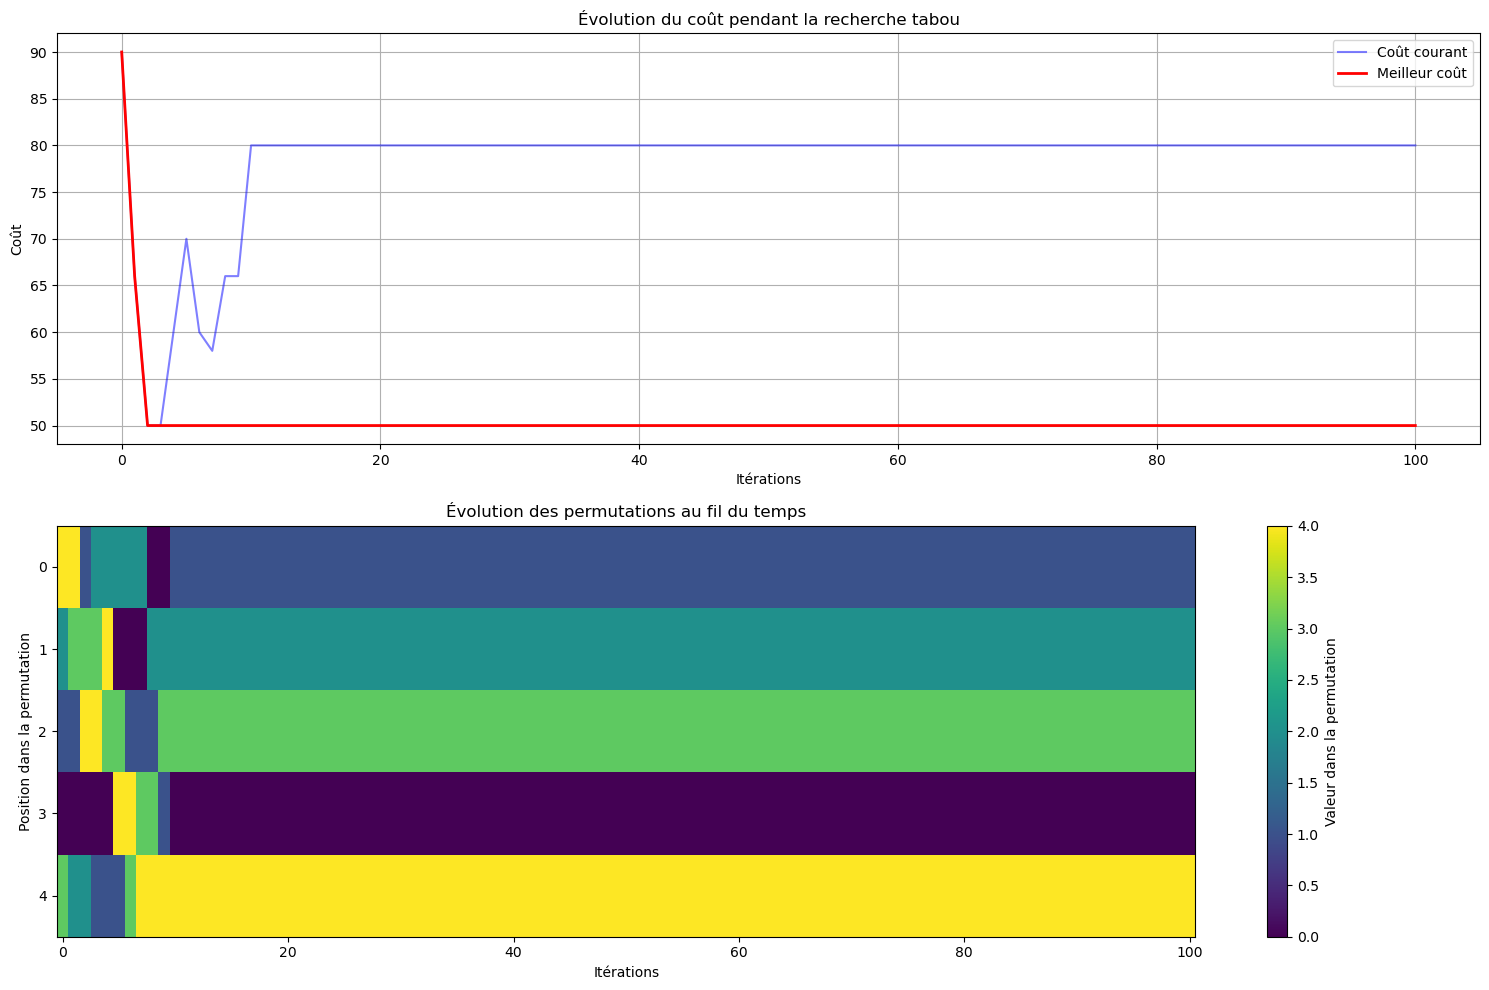

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from typing import List, Tuple, Dict
import random

# Matrices de flux (F) et de distance (D) pour NUG5
F = np.array([
    [0, 5, 2, 4, 1],
    [5, 0, 3, 0, 2],
    [2, 3, 0, 0, 0],
    [4, 0, 0, 0, 5],
    [1, 2, 0, 5, 0]
])

D = np.array([
    [0, 1, 1, 2, 3],
    [1, 0, 2, 1, 2],
    [1, 2, 0, 1, 2],
    [2, 1, 1, 0, 1],
    [3, 2, 2, 1, 0]
])

def calculer_cout(permutation: List[int]) -> int:
 
    n = len(permutation)
    cout = 0
    for i in range(n):
        for j in range(n):
            cout += F[i][j] * D[permutation[i]][permutation[j]]
    return cout

def generer_voisins(permutation: List[int]) -> List[Tuple[List[int], Tuple[int, int]]]:
  
    n = len(permutation)
    voisins = []
    for i in range(n):
        for j in range(i + 1, n):
            voisin = permutation.copy()
            voisin[i], voisin[j] = voisin[j], voisin[i]
            voisins.append((voisin, (i, j)))
    return voisins

def recherche_tabou(iterations_max: int = 100, taille_liste_tabou: int = 10) -> Tuple[List[int], int, Dict]:
 
    # Initialisation des historiques pour la visualisation
    historique = {
        'costs': [],
        'best_costs': [],
        'solutions': []
    }
    
    # Solution initiale aléatoire
    solution_courante = list(range(5))
    random.shuffle(solution_courante)
    
    # Initialisation des meilleures valeurs
    meilleure_solution = solution_courante.copy()
    meilleur_cout = calculer_cout(solution_courante)
    cout_courant = meilleur_cout
    
    # Liste tabou et compteur
    liste_tabou = []
    iterations_sans_amelioration = 0
    
    # Enregistrement de l'état initial
    historique['costs'].append(cout_courant)
    historique['best_costs'].append(meilleur_cout)
    historique['solutions'].append(solution_courante.copy())
    
    # Boucle principale de recherche
    for iteration in range(iterations_max):
        voisins = generer_voisins(solution_courante)
        meilleur_voisin = None
        meilleur_cout_voisin = float('inf')
        meilleur_mouvement = None
        
        # Recherche du meilleur voisin non tabou
        for voisin, mouvement in voisins:
            if mouvement not in liste_tabou:
                cout_voisin = calculer_cout(voisin)
                if cout_voisin < meilleur_cout_voisin:
                    meilleur_voisin = voisin
                    meilleur_cout_voisin = cout_voisin
                    meilleur_mouvement = mouvement
        
        # Mise à jour de la solution si un voisin valide est trouvé
        if meilleur_voisin is not None:
            solution_courante = meilleur_voisin
            cout_courant = meilleur_cout_voisin
            
            # Gestion de la liste tabou
            liste_tabou.append(meilleur_mouvement)
            if len(liste_tabou) > taille_liste_tabou:
                liste_tabou.pop(0)
            
            # Mise à jour de la meilleure solution
            if meilleur_cout_voisin < meilleur_cout:
                meilleure_solution = meilleur_voisin
                meilleur_cout = meilleur_cout_voisin
                iterations_sans_amelioration = 0
            else:
                iterations_sans_amelioration += 1
        
        # Enregistrement de l'historique
        historique['costs'].append(cout_courant)
        historique['best_costs'].append(meilleur_cout)
        historique['solutions'].append(solution_courante.copy())
        
        # Critère d'arrêt
        if iterations_sans_amelioration > 20:
            break
    
    return meilleure_solution, meilleur_cout, historique

def visualiser_recherche(historique: Dict):

    plt.figure(figsize=(15, 10))
    
    # Plot 1: Évolution du coût
    plt.subplot(2, 1, 1)
    iterations = range(len(historique['costs']))
    plt.plot(iterations, historique['costs'], 'b-', label='Coût courant', alpha=0.5)
    plt.plot(iterations, historique['best_costs'], 'r-', label='Meilleur coût', linewidth=2)
    plt.xlabel('Itérations')
    plt.ylabel('Coût')
    plt.title('Évolution du coût pendant la recherche tabou')
    plt.grid(True)
    plt.legend()

    # Plot 2: Heatmap des permutations
    plt.subplot(2, 1, 2)
    solutions_array = np.array(historique['solutions'])
    plt.imshow(solutions_array.T, aspect='auto', cmap='viridis')
    plt.colorbar(label='Valeur dans la permutation')
    plt.xlabel('Itérations')
    plt.ylabel('Position dans la permutation')
    plt.title('Évolution des permutations au fil du temps')
    
    plt.tight_layout()
    plt.show()

def executer_et_visualiser(iterations_max: int = 100, taille_liste_tabou: int = 10):
  
    # Exécution de la recherche tabou
    solution_finale, cout_final, historique = recherche_tabou(iterations_max, taille_liste_tabou)
    
    # Affichage des résultats
    print(f"Meilleure permutation trouvée: {[x+1 for x in solution_finale]}")
    print(f"Coût minimal: {cout_final}")
    
    # Création des visualisations
    visualiser_recherche(historique)

# Exécution de l'algorithme
if __name__ == "__main__":
    executer_et_visualiser(iterations_max=100, taille_liste_tabou=10)

<h3>Without visualisation</h3>

In [6]:
import numpy as np
from typing import List, Tuple
import random

# Matrices de flux (F) et de distance (D) pour NUG5
F = np.array([
    [0, 5, 2, 4, 1],
    [5, 0, 3, 0, 2],
    [2, 3, 0, 0, 0],
    [4, 0, 0, 0, 5],
    [1, 2, 0, 5, 0]
])

D = np.array([
    [0, 1, 1, 2, 3],
    [1, 0, 2, 1, 2],
    [1, 2, 0, 1, 2],
    [2, 1, 1, 0, 1],
    [3, 2, 2, 1, 0]
])

def calculer_cout(permutation: List[int]) -> int:
   
    n = len(permutation)
    cout = 0
    for i in range(n):
        for j in range(n):
            # Multiplie le flux entre i et j par la distance entre leurs positions dans la permutation
            cout += F[i][j] * D[permutation[i]][permutation[j]]
    return cout

def generer_voisins(permutation: List[int]) -> List[Tuple[List[int], Tuple[int, int]]]:

    n = len(permutation)
    voisins = []
    for i in range(n):
        for j in range(i + 1, n):
            voisin = permutation.copy()
            voisin[i], voisin[j] = voisin[j], voisin[i]
            voisins.append((voisin, (i, j)))
    return voisins

def recherche_tabou(iterations_max: int = 100, taille_liste_tabou: int = 10) -> Tuple[List[int], int]:

    # Solution initiale : permutation aléatoire de [0,1,2,3,4]
    solution_courante = list(range(5))
    random.shuffle(solution_courante)
    
    meilleure_solution = solution_courante.copy()
    meilleur_cout = calculer_cout(solution_courante)
    
    # Liste tabou pour stocker les mouvements interdits
    liste_tabou = []
    
    # Compteur d'itérations sans amélioration
    iterations_sans_amelioration = 0
    
    for iteration in range(iterations_max):
        # Générer tous les voisins possibles
        voisins = generer_voisins(solution_courante)
        
        # Trouver le meilleur voisin non tabou
        meilleur_voisin = None
        meilleur_cout_voisin = float('inf')
        meilleur_mouvement = None
        
        for voisin, mouvement in voisins:
            if mouvement not in liste_tabou:
                cout_voisin = calculer_cout(voisin)
                if cout_voisin < meilleur_cout_voisin:
                    meilleur_voisin = voisin
                    meilleur_cout_voisin = cout_voisin
                    meilleur_mouvement = mouvement
        
        # Mise à jour de la solution courante
        if meilleur_voisin is not None:
            solution_courante = meilleur_voisin
            
            # Ajouter le mouvement à la liste tabou
            liste_tabou.append(meilleur_mouvement)
            if len(liste_tabou) > taille_liste_tabou:
                liste_tabou.pop(0)
            
            # Mise à jour de la meilleure solution si nécessaire
            if meilleur_cout_voisin < meilleur_cout:
                meilleure_solution = meilleur_voisin
                meilleur_cout = meilleur_cout_voisin
                iterations_sans_amelioration = 0
            else:
                iterations_sans_amelioration += 1
        
        # Critère d'arrêt si pas d'amélioration pendant plusieurs itérations
        if iterations_sans_amelioration > 20:
            break
    
    return meilleure_solution, meilleur_cout

# Exécution de l'algorithme plusieurs fois pour trouver la meilleure solution
def rechercher_meilleure_solution(nb_executions: int = 10) -> Tuple[List[int], int]:

    meilleure_solution_globale = None
    meilleur_cout_global = float('inf')
    
    for i in range(nb_executions):
        solution, cout = recherche_tabou()
        if cout < meilleur_cout_global:
            meilleure_solution_globale = solution
            meilleur_cout_global = cout
    
    return meilleure_solution_globale, meilleur_cout_global

# Exécution et affichage des résultats
solution_finale, cout_final = rechercher_meilleure_solution(20)
print(f"Meilleure permutation trouvée: {[x+1 for x in solution_finale]}")
print(f"Coût minimal: {cout_final}")

Meilleure permutation trouvée: [3, 4, 5, 1, 2]
Coût minimal: 50
